In [6]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X,y = load_diabetes().data, load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 8)

In [8]:
load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

slr = LinearRegression()

slr.fit(X_train, y_train)
print(slr.coef_)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('MSE train: %.3f, test: %.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

[   11.5106203   -282.51347161   534.20455671   401.73142674
 -1043.89718398   634.92464089   186.43262636   204.93373199
   762.47149733    91.9460394 ]
MSE train: 2812.369, test: 3108.041
R^2 train: 0.530, test: 0.459


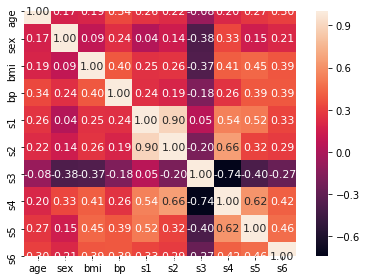

In [16]:
cols = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']

import pandas as pd
data = load_diabetes()
feature = pd.DataFrame(data['data'], columns = data['feature_names'])
target = pd.DataFrame(data['target'], columns = ['target'])
df = pd.concat([feature, target], axis = 1)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = np.corrcoef(df[cols].values.T) #.T是轉置矩陣（因為python預設用列的方向計算）
#sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,
                 cbar = True, #圖右手邊的長條熱度圖
                 annot = True, # 是否顯示數值
                 square = True, #是否為正方形
                 fmt = '.2f', #浮點數幾位
                 annot_kws = {'size': 11},
                 yticklabels = cols,
                 xticklabels = cols)

plt.tight_layout()
plt.savefig('correlation2.png',dpi = 300)
plt.show()

# Ridge

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(X_train,y_train) ## alpha = 1
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

[  36.8262072   -75.80823733  282.42652716  207.39314972   -1.46580263
  -27.81750835 -134.3740951    98.97724793  222.67543268  117.97255343]


In [27]:
print('MSE train: %.3f, test: %.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

MSE train: 3397.720, test: 3262.233
R^2 train: 0.433, test: 0.433


In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10).fit(X_train,y_train)
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('MSE train: %.3f, test: %.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

[ 15.08676646  -1.9586191   60.69903425  47.11843221  14.72337546
   9.87779644 -35.56015266  35.74603575  54.27193163  37.42095846]
MSE train: 5083.146, test: 4817.252
R^2 train: 0.151, test: 0.162


In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1).fit(X_train,y_train)
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('MSE train: %.3f, test: %.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

[  24.77802114 -228.33364296  495.54594378  361.21481169 -109.82542594
  -78.3286822  -190.69780344  108.24040795  383.72269392  107.42593373]
MSE train: 2865.170, test: 3027.227
R^2 train: 0.522, test: 0.473


# LASSO

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(X_train,y_train)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE train: %.3f, test: %.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

[  0.          -0.         384.73421807  72.69325545   0.
   0.          -0.           0.         247.88881314   0.        ]
MSE train: 3818.201, test: 3646.836
R^2 train: 0.362, test: 0.366


In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1).fit(X_train,y_train)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE train: %.3f, test: %.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

[   0.         -181.40911617  537.71961152  355.19720303 -105.43471481
   -0.         -198.99829878    0.          440.25133426   48.25573121]
MSE train: 2877.650, test: 2989.599
R^2 train: 0.519, test: 0.480


In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001).fit(X_train,y_train)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE train: %.3f, test: %.3f'%(
        mean_squared_error(y_train,y_train_pred),
        mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f'%(
        r2_score(y_train,y_train_pred),
        r2_score(y_test,y_test_pred)))

[  11.82931254 -281.06324599  534.59556593  401.25597128 -971.04936503
  579.28119134  151.83257187  191.85084436  736.83680063   91.17487055]
MSE train: 2812.574, test: 3102.099
R^2 train: 0.530, test: 0.460
